## Problématique :


# <span style="color: #FF0000">**Qu'est ce qui fait qu'une voiture est vendue plus chère qu'une autre ?**</span>


## I/ Charger et explorer les données


In [1]:
# On charge les données, avec la librairie Pandas:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("carDetailsOld.csv", encoding="latin-1")

Nous affichons notre **DataFrame** pandas.


In [2]:
# display(df) produit un affichage "spécial jupyter" du contenu du DataFrame df
# Taper le nom d'une variable à la dernière ligne d'une cellule est un raccourci pour display.
df #.head(5) permet d'afficher juste les 5 premiers 

Make                                  Model    Price  Year  \
0             Honda                    Amaze 1.2 VX i-VTEC   505000  2017   
1     Maruti Suzuki                        Swift DZire VDI   450000  2014   
2           Hyundai                   i10 Magna 1.2 Kappa2   220000  2011   
3            Toyota                               Glanza G   799000  2019   
4            Toyota        Innova 2.4 VX 7 STR [2016-2020]  1950000  2018   
...             ...                                    ...      ...   ...   
2054       Mahindra                  XUV500 W8 [2015-2017]   850000  2016   
2055        Hyundai                           Eon D-Lite +   275000  2014   
2056           Ford            Figo Duratec Petrol ZXI 1.2   240000  2013   
2057            BMW  5-Series 520d Luxury Line [2017-2019]  4290000  2018   
2058       Mahindra      Bolero Power Plus ZLX [2016-2019]   670000  2017   

      Kilometer Fuel Type Transmission    Location   Color   Owner  \
0         87150    Petrol       Manual        Pune    Grey   First   
1         75000    Diesel       Manual    Ludhiana   White  Second   
2         67000    Petrol       Manual     Lucknow  Maroon   First   
3         37500    Petrol       Manual   Mangalore     Red   First   
4         69000    Diesel       Manual      Mumbai    Grey   First   
...         ...       ...          ...         ...     ...     ...   
2054      90300    Diesel       Manual       Surat   White   First   
2055      83000    Petrol       Manual   Ahmedabad   White  Second   
2056      73000    Petrol       Manual       Thane  Silver   First   
2057      60474    Diesel    Automatic  Coimbatore   White   First   
2058      72000    Diesel       Manual    Guwahati   White   First   

     Seller Type   Engine           Max Power              Max Torque  \
0      Corporate  1198 cc   87 bhp @ 6000 rpm       109 Nm @ 4500 rpm   
1     Individual  1248 cc   74 bhp @ 4000 rpm       190 Nm @ 2000 rpm   
2     Individual  1197 cc   79 bhp @ 6000 rpm  112.7619 Nm @ 4000 rpm   
3     Individual  1197 cc   82 bhp @ 6000 rpm       113 Nm @ 4200 rpm   
4     Individual  2393 cc  148 bhp @ 3400 rpm       343 Nm @ 1400 rpm   
...          ...      ...                 ...                     ...   
2054  Individual  2179 cc  138 bhp @ 3750 rpm       330 Nm @ 1600 rpm   
2055  Individual   814 cc   55 bhp @ 5500 rpm        75 Nm @ 4000 rpm   
2056  Individual  1196 cc   70 bhp @ 6250 rpm       102 Nm @ 4000 rpm   
2057  Individual  1995 cc  188 bhp @ 4000 rpm       400 Nm @ 1750 rpm   
2058  Individual  1493 cc   70 bhp @ 3600 rpm       195 Nm @ 1400 rpm   

     Drivetrain  Length   Width  Height  Seating Capacity  Fuel Tank Capacity  
0           FWD  3990.0  1680.0  1505.0               5.0                35.0  
1           FWD  3995.0  1695.0  1555.0               5.0                42.0  
2           FWD  3585.0  1595.0  1550.0               5.0                35.0  
3           FWD  3995.0  1745.0  1510.0               5.0                37.0  
4           RWD  4735.0  1830.0  1795.0               7.0                55.0  
...         ...     ...     ...     ...               ...                 ...  
2054        FWD  4585.0  1890.0  1785.0               7.0                70.0  
2055        FWD  3495.0  1550.0  1500.0               5.0                32.0  
2056        FWD  3795.0  1680.0  1427.0               5.0                45.0  
2057        RWD  4936.0  1868.0  1479.0               5.0                65.0  
2058        RWD  3995.0  1745.0  1880.0               7.0                 NaN  

[2059 rows x 20 columns]

In [3]:
print(df["Engine"])

0       1198 cc
1       1248 cc
2       1197 cc
3       1197 cc
4       2393 cc
         ...   
2054    2179 cc
2055     814 cc
2056    1196 cc
2057    1995 cc
2058    1493 cc
Name: Engine, Length: 2059, dtype: object


In [4]:
print("Type de données par colonne : \n", df.dtypes)
print("\n")
print("Nb de lignes : ", len(df))
print("Nb de colonnes : ", len(df.columns))
print("\n")
print("Les colonnes les plus importantes pour nous sont : la marque, le modèle, le prix, le kilométrage et la puissance")

Type de données par colonne : 
 Make                   object
Model                  object
Price                   int64
Year                    int64
Kilometer               int64
Fuel Type              object
Transmission           object
Location               object
Color                  object
Owner                  object
Seller Type            object
Engine                 object
Max Power              object
Max Torque             object
Drivetrain             object
Length                float64
Width                 float64
Height                float64
Seating Capacity      float64
Fuel Tank Capacity    float64
dtype: object


Nb de lignes :  2059
Nb de colonnes :  20


Les colonnes les plus importantes pour nous sont : la marque, le modèle, le prix, le kilométrage et la puissance


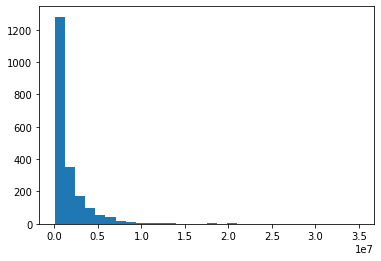

Prix moyen d'un véhicule :  1702992 ₹
Nombre de voitures en FWD :  1330 nombre de voitures en RWD :  321 nombre de voitures en AWD :  272
Soit en pourcentage :  64.59446333171442 % de FWD,  15.590092277804759 % de RWD et  13.210296260320545 % de AWD


In [5]:
prix = df["Price"].to_list()
plt.hist(prix, bins=30)
plt.show()

print("Prix moyen d'un véhicule : ", int(df["Price"].mean().round()), "₹")

print("Nombre de voitures en FWD : ", len(df[df["Drivetrain"] == "FWD"]), "nombre de voitures en RWD : ", len(df[df["Drivetrain"] == "RWD"]), "nombre de voitures en AWD : ", len(df[df["Drivetrain"] == "AWD"]))
print("Soit en pourcentage : ", len(df[df["Drivetrain"] == "FWD"])/len(df)*100, "% de FWD, ", len(df[df["Drivetrain"] == "RWD"])/len(df)*100, "% de RWD et ", len(df[df["Drivetrain"] == "AWD"])/len(df)*100, "% de AWD")

## III/ Nettoyage et présentation de données


### Supprimer les colonnes non pertinentes

In [6]:

del df["Color"]
del df['Location']

df = pd.read_csv("carDetailsV4.csv", encoding="latin-1")
df=df.dropna(axis=0)

#Permet d'afficher le dataframe
display(df[30:33])

df1=df
# Permet de suppr les NAN
df1["Engine"] =df1["Engine"].dropna()
# Permet d'enlever les deux caractères cc
df1["Engine"] = df1["Engine"].replace('cc', '')
df1["Engine"] = df1["Engine"].astype(str).apply(lambda x: x[:-3])

FileNotFoundError: [Errno 2] No such file or directory: 'carDetailsV4.csv'

In [ ]:
df1["Engine"]

In [ ]:
df

In [ ]:
print(df[df['Engine']==''])

#### Les données comprennent-elles des caractéristiques pertinentes pour la problématique ?


Oui, de nombreuses caractériqtiques présente dans notre base de données peuvent influer sur le prix tel que la réputation de la marque, le nombre de kilomètrage, la puissance du vehicule, son type de carburant, son type de boite de vitesse.


## V/ Choisir les variables explicatives et la variable à expliquer : faire une régression et commenter les resultats


les variables explicatives sont :

- les marques et son model
- l'année
- le kilometrage
- le type de carburant
- le type de transmission (boite et type de motorisation)
- la ville où elle est disponible
- la puissance
- la taille
- la capacité de carburant

La variable à expliquer sera le **prix**


### Afficher le pourcentage de chaque marque dans un camembert 

### Quels sont les types de données présents (symbolique, numérique, etc.) ?

Les types de données présentes sont des valeurs numériques avec des unités (exemple : la puissance du véhicule), des chaînes de caractère (exemple : nom de la marque) ou des valeurs numériques simples (exemple : le prix).

### Est-il possible de ne garder que les colonnes pertinentes ?


Oui, on peut supprimer les colonnes qui nous paraissent non pertinentes car elles n'affectent pas ou très peu le prix tels que la couleur et la ville de vente.

## Qu'est ce que la régression ?

Évolution qui ramène à un degré moindre.

Une régression est basée sur l'idée qu'une variable dépendante est déterminée par une ou plusieurs variables indépendantes

# Exemple de régression :

la taille de notre échantillon est : (50,)


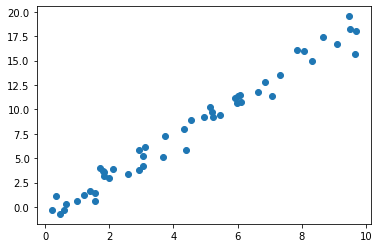

In [7]:
rng = np.random.RandomState(42) #pour générer les mêmes données

#constituer  un exmple de points aléatoires  
x = 10 * rng.rand(50) #genere un tbl de 50
print('la taille de notre échantillon est :',x.shape)

y=2*x-1 + rng.randn(50) # définir une relation entre x et y + bruit 

#afficher data y=f(x) [y en fonction de x]  comme un nuage de points 
plt.scatter(x, y);

## Comparer deux véhicules

In [8]:
# On compare le prix, l'année, le kilomètrage et la puissance de deux vehicules de marques différentes de df

vehicule1 = df[df["Make"] == "Audi"]
vehicule2 = df[df["Make"] == "BMW"]

print("Prix moyen d'une Audi : ", int(vehicule1["Price"].mean().round()), "₹\n")
print("Prix moyen d'une BMW : ", int(vehicule2["Price"].mean().round()), "₹\n")

if vehicule1["Price"].mean() > vehicule2["Price"].mean():
    print("En moyenne, les Audi sont plus cher que les BMW\n")
else:
    print("En moyenne, les BMW sont plus chers que les Audi\n")

print("Année moyenne d'un Audi : ", int(vehicule1["Year"].mean().round()), "\n")
print("Année moyenne d'un BMW : ", int(vehicule2["Year"].mean().round()), "\n")

if vehicule1["Year"].mean() > vehicule2["Year"].mean():
    print("L'Audi est plus récente que le BMW en moyenne.\n")
else:
    print("La BMW est plus récente que l'Audi en moyenne.\n")

print("Kilométrage moyen d'un Audi : ", int(vehicule1["Kilometer"].mean().round()), "km\n")
print("Kilométrage moyen d'un BMW : ", int(vehicule2["Kilometer"].mean().round()), "km\n")

if vehicule1["Kilometer"].mean() > vehicule2["Kilometer"].mean():
    print("En moyenne,l'Audi a plus de kilomètres que le BMW\n")
else:
    print("En moyenne, la BMW a plus de kilomètres que l'Audi\n")
    
# print(vehicule1["Engine"])

# print("Puissance moyenne d'un Audi : ", int(vehicule1["Engine"].mean().round()), "ch\n")
#print("Puissance moyenne d'un BMW : ", float(vehicule2["Engine"].mean().round()), "ch\n")
#print("ligne : ", df["Engine"])

#if vehicule1["Engine"].mean() > vehicule2["Engine"].mean():
#    print("En moyenne, l'Audi a plus de puissance que le BMW\n")
#else:
#    print("En moyenne, la BMW a plus de puissance que l'Audi\n")

Prix moyen d'une Audi :  2703134 ₹

Prix moyen d'une BMW :  3768967 ₹

En moyenne, les BMW sont plus chers que les Audi

Année moyenne d'un Audi :  2016 

Année moyenne d'un BMW :  2017 

La BMW est plus récente que l'Audi en moyenne.

Kilométrage moyen d'un Audi :  54319 km

Kilométrage moyen d'un BMW :  50453 km

En moyenne,l'Audi a plus de kilomètres que le BMW



TypeError: can only concatenate str (not "int") to str

**On peut voir, que le prix est influé par l'année de sortie et le kilometrage. Ici, les BMW sont en moyenne plus récentes, ont en moyenne moins de kilomètrage et sont plus puissante ce qui peut expliquer leur prix plus élévé.**

In [ ]:
# Export moi le dataframe en csv
df.to_csv('carDetails.csv', index=False)
